# Python-Control Examples 1: System models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from control import tf, ss, initial_response, impulse_response, step_response
from control.matlab import c2d, step, impulse, lsim

## Continuous-time, linear, first-order SISO system

In [62]:
# Transfer function (Laplace domain)
G = tf(2, [8, 1])
G

TransferFunction(array([2]), array([8, 1]))

## Step response

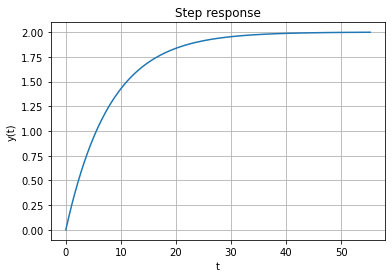

In [3]:
T, yout = step_response(G)
plt.plot(T, yout)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Step response')
plt.grid()
plt.show()

## Impulse response

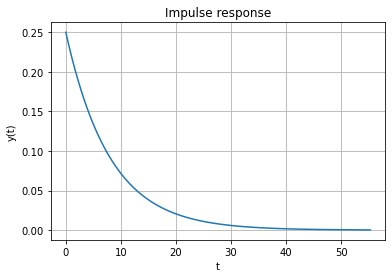

In [4]:
T, yout = impulse_response(G)
plt.plot(T, yout)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Impulse response')
plt.grid()
plt.show()

## Convert to discrete-time system

In [5]:
Ts = 2  # sample time
# Convert to z-transform
Gd = c2d(G, Ts, method='zoh')
Gd

TransferFunction(array([0.44239843]), array([ 1.        , -0.77880078]), 2)

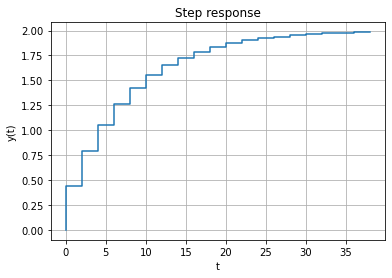

In [6]:
T, yout = step_response(Gd)
plt.step(T, yout)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Step response')
plt.grid()
plt.show()

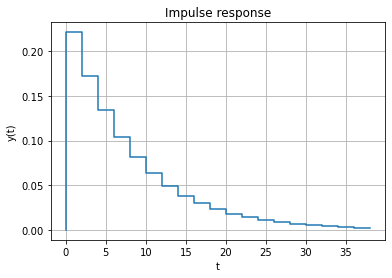

In [7]:
T, yout = impulse_response(Gd)
plt.step(T, yout)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Impulse response')
plt.grid()
plt.show()

## Response to input signal

/Users/billtubbs/anaconda3/envs/torch/lib/python3.6/site-packages/control/timeresp.py:294: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


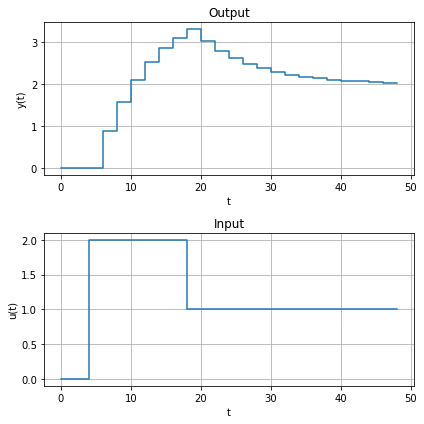

In [8]:
T = np.arange(0, 50, Ts)
U = np.zeros(T.shape)
U[T >= 5] = 2
U[T >= 20] = 1
yout, T, xout = lsim(Gd, U=U, T=T)

fig, axes = plt.subplots(2, 1, figsize=(6, 6))

ax = axes[0]
ax.step(T, yout)
ax.set_xlabel('t')
ax.set_ylabel('y(t)')
ax.set_title('Output')
ax.grid()

ax = axes[1]
ax.step(T, U)
ax.set_xlabel('t')
ax.set_ylabel('u(t)')
ax.set_title('Input')
ax.grid()

plt.tight_layout()
plt.show()

## Continuous-time, linear, second-order SISO system

In [63]:
# Transfer function (Laplace domain)
s = tf('s')
G = 2 / (1 + 5*s)**2
G

TransferFunction(array([2]), array([25., 10.,  1.]))

## Step response

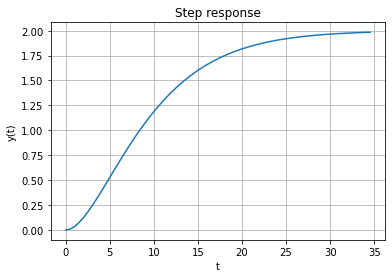

In [10]:
T, yout = step_response(G)
plt.plot(T, yout)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Step response')
plt.grid()
plt.show()

## Impulse response

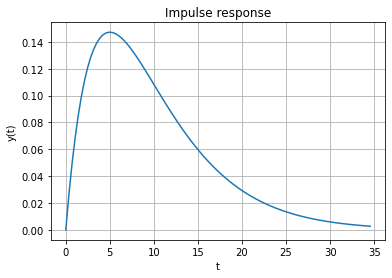

In [11]:
T, yout = impulse_response(G)
plt.plot(T, yout)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Impulse response')
plt.grid()
plt.show()

## Conversion to state-space representation

In [12]:
Gss = ss(G)
Gss

StateSpace(array([[-0.4 , -0.04],
       [ 1.  ,  0.  ]]), array([[-1.],
       [ 0.]]), array([[ 0.  , -0.08]]), array([[0.]]))

In [13]:
Gss.A, Gss.B, Gss.C, Gss.D

(matrix([[-0.4 , -0.04],
         [ 1.  ,  0.  ]]), matrix([[-1.],
         [ 0.]]), matrix([[ 0.  , -0.08]]), matrix([[0.]]))

In [14]:
Gss.pole()

array([-0.2+3.22509383e-09j, -0.2-3.22509383e-09j])

In [15]:
Gss.zero()

array([], dtype=float64)

## Response to input signal

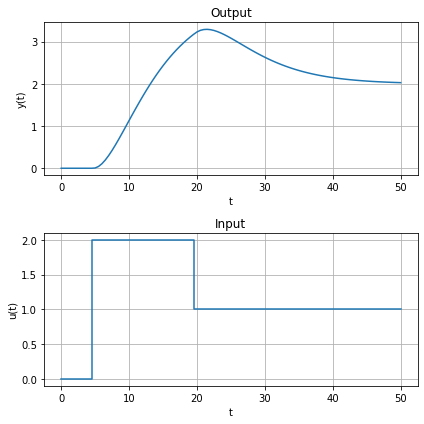

In [16]:
T = np.linspace(0, 50, 101)
U = np.zeros(T.shape)
U[T >= 5] = 2
U[T >= 20] = 1
yout, T, xout = lsim(Gss, U=U, T=T)

fig, axes = plt.subplots(2, 1, figsize=(6, 6))

ax = axes[0]
ax.plot(T, yout)
ax.set_xlabel('t')
ax.set_ylabel('y(t)')
ax.set_title('Output')
ax.grid()

ax = axes[1]
ax.step(T, U)
ax.set_xlabel('t')
ax.set_ylabel('u(t)')
ax.set_title('Input')
ax.grid()

plt.tight_layout()
plt.show()

## Convert to discrete-time system

In [19]:
Ts = 2
Gdss = c2d(Gss, Ts, method='zoh')
Gdss

StateSpace(array([[ 0.40219203, -0.0536256 ],
       [ 1.34064009,  0.93844806]]), array([[-1.34064009],
       [-1.53879839]]), array([[ 0.  , -0.08]]), array([[0.]]), 2)

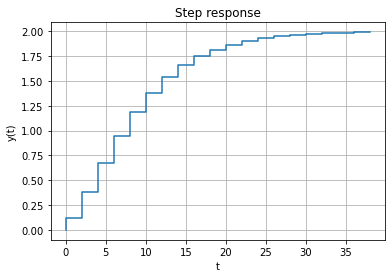

In [20]:
T, yout = step_response(Gdss)
plt.step(T, yout)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Step response')
plt.grid()
plt.show()

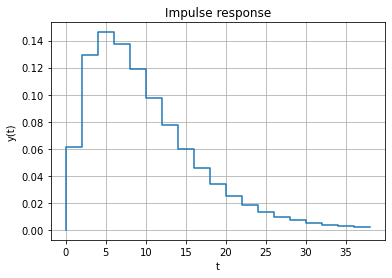

In [21]:
T, yout = impulse_response(Gdss)
plt.step(T, yout)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Impulse response')
plt.grid()
plt.show()

In [22]:
Gdss.dt

2

In [23]:
Gdss.A, Gdss.B, Gdss.C, Gdss.D

(matrix([[ 0.40219203, -0.0536256 ],
         [ 1.34064009,  0.93844806]]), matrix([[-1.34064009],
         [-1.53879839]]), matrix([[ 0.  , -0.08]]), matrix([[0.]]))

In [24]:
Gdss.pole()

array([0.67032005+7.50226807e-09j, 0.67032005-7.50226807e-09j])

In [25]:
Gdss.zero()

array([-0.76580754+0.j])

## Response to input signal

/Users/billtubbs/anaconda3/envs/torch/lib/python3.6/site-packages/control/timeresp.py:294: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


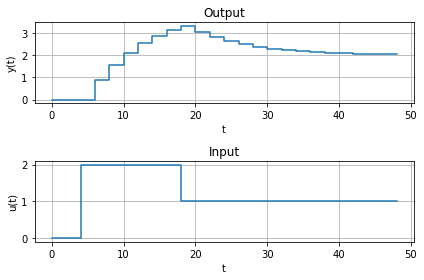

In [26]:
T = np.arange(0, 50, Ts)
U = np.zeros(T.shape)
U[T >= 5] = 2
U[T >= 20] = 1
yout, T, xout = lsim(Gd, U=U, T=T)

fig, axes = plt.subplots(2, 1)

ax = axes[0]
ax.step(T, yout)
ax.set_xlabel('t')
ax.set_ylabel('y(t)')
ax.set_title('Output')
ax.grid()

ax = axes[1]
ax.step(T, U)
ax.set_xlabel('t')
ax.set_ylabel('u(t)')
ax.set_title('Input')
ax.grid()

plt.tight_layout()
plt.show()

## Multi-variable linear system

In [27]:
# Continous-time transfer functions
G11 = tf(2, [8, 1])
G12 = tf(-0.5, [8, 1])
G21 = tf(-0.3, [10, 1])
G22 = tf(-1, [10, 1])

In [43]:
tf([[[2], [-0.5]], [[0.3], [-1]]], [[[8, 1], [8, 1]], [[10, 1], [10, 1]]])

TransferFunction([[array([2]), array([-0.5])], [array([0.3]), array([-1])]], [[array([8, 1]), array([8, 1])], [array([10,  1]), array([10,  1])]])

In [48]:
from control import parallel, append, series

parallel(G11, G12)

TransferFunction(array([12. ,  1.5]), array([64, 16,  1]))

In [75]:
sys1 = ss([[1., -2], [3., -4]], [[5.], [7]], [[6., 8]], [[9.]])
sys2 = ss([[-1.]], [[1.]], [[1.]], [[0.]])
sys = append(sys1, sys2)
sys

StateSpace(array([[ 1., -2.,  0.],
       [ 3., -4.,  0.],
       [ 0.,  0., -1.]]), array([[5., 0.],
       [7., 0.],
       [0., 1.]]), array([[6., 8., 0.],
       [0., 0., 1.]]), array([[9., 0.],
       [0., 0.]]))

In [76]:
G = append(G11 + G12, G21 + G22)
G

StateSpace(array([[-0.125,  0.   ],
       [ 0.   , -0.1  ]]), array([[1., 0.],
       [0., 1.]]), array([[ 0.1875,  0.    ],
       [ 0.    , -0.13  ]]), array([[0., 0.],
       [0., 0.]]))

In [77]:
G.issiso()

False

In [78]:
G.ninputs, G.noutputs

(2, 2)

In [81]:
G[0, 0]

StateSpace(array([[-0.125,  0.   ],
       [ 0.   , -0.1  ]]), array([[1.],
       [0.]]), array([[0.1875, 0.    ]]), array([[0.]]))

In [82]:
G[1, 0]

StateSpace(array([[-0.125,  0.   ],
       [ 0.   , -0.1  ]]), array([[1.],
       [0.]]), array([[ 0.  , -0.13]]), array([[0.]]))

In [83]:
G[0, 1]

StateSpace(array([[-0.125,  0.   ],
       [ 0.   , -0.1  ]]), array([[0.],
       [1.]]), array([[0.1875, 0.    ]]), array([[0.]]))

In [84]:
G[1, 1]

StateSpace(array([[-0.125,  0.   ],
       [ 0.   , -0.1  ]]), array([[0.],
       [1.]]), array([[ 0.  , -0.13]]), array([[0.]]))

In [65]:
dir(G)

['__add__',
 '__array_priority__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pow__',
 '__radd__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_common_den',
 '_dcgain',
 '_isstatic',
 '_repr_latex_',
 '_truncatecoeff',
 'damp',
 'dcgain',
 'den',
 'dt',
 'feedback',
 'freqresp',
 'frequency_response',
 'horner',
 'inputs',
 'isctime',
 'isdtime',
 'issiso',
 'minreal',
 'ninputs',
 'noutputs',
 'num',
 'outputs',
 'pole',
 'returnScipySignalLTI',
 's',
 'sample',
 'z',
 'zero']

TransferFunction(array([2]), array([25., 10.,  1.]))